# Exploratory Data Analysis (EDA) and Transformation/Training Pipelines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv", sep=";")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


## 1. From the previous analyzis we can remove records with missing values in columns "Sex" and "Embarked":

In [4]:
data.drop(index = data[data.Sex == 'unknown'].index, inplace=True)
data.dropna(subset=['Embarked'], inplace=True)

## 2. Separate target variable:

In [5]:
y = data['Survived']
X = data.drop(columns=['Survived'])

In [6]:
X.shape, y.shape

((884, 11), (884,))

## 3. Split dataset into training and testing sets (usually, it's split into training, validation, and testing sets, but today we will use the testing set as validation one):

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.head()

## 4. We also desided to drop columns "PassengerId", "Name", "Ticket", and "Cabin". Pipeline allows us to do this without changing the data frame.

In [8]:
from sklearn.compose import ColumnTransformer

In [ ]:
transform1 = ColumnTransformer(transformers=[('drop_colums', 'drop', ["PassengerId", "Name", "Ticket", "Cabin"])], remainder='passthrough')

In [ ]:
transform1.fit_transform(X_train)

array([[2, 'male', 36.0, ..., 2, 27.75, 'S'],
       [1, 'female', 22.0, ..., 0, 66.6, 'S'],
       [3, 'female', nan, ..., 0, 14.4542, 'C'],
       ...,
       [1, 'male', 31.0, ..., 0, 50.4958, 'S'],
       [3, 'male', 20.0, ..., 0, 9.5, 'S'],
       [3, 'male', 38.0, ..., 0, 7.8958, 'S']], dtype=object)

In [ ]:
transform1.get_feature_names_out()

array(['remainder__Pclass', 'remainder__Sex', 'remainder__Age',
       'remainder__SibSp', 'remainder__Parch', 'remainder__Fare',
       'remainder__Embarked'], dtype=object)

In [ ]:
pd.DataFrame(transform1.transform(X_train), columns=transform1.get_feature_names_out()).head()

,remainder__Pclass,remainder__Sex,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare,remainder__Embarked
0,2,male,36.0,1,2,27.75,S
1,1,female,22.0,1,0,66.6,S
2,3,female,NaN,1,0,14.4542,C
3,2,male,19.0,0,0,10.5,S
4,3,female,NaN,0,0,7.2292,C


## 5. We also decided that "Sex" and "Embarked" are nominal features. We need to apply one-hot encoder to them.

In [9]:
from sklearn.preprocessing import OneHotEncoder
onee = OneHotEncoder(drop='first')

In [ ]:
transform2 = ColumnTransformer(transformers=[('one-hot', onee, ["Sex", "Embarked"]), \
    ('drop_colums', 'drop', ["PassengerId", "Name", "Ticket", "Cabin"])], remainder='passthrough')

In [ ]:
transform2.fit_transform(X_train)

array([[ 1.    ,  0.    ,  1.    , ...,  1.    ,  2.    , 27.75  ],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 66.6   ],
       [ 0.    ,  0.    ,  0.    , ...,  1.    ,  0.    , 14.4542],
       ...,
       [ 1.    ,  0.    ,  1.    , ...,  0.    ,  0.    , 50.4958],
       [ 1.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  9.5   ],
       [ 1.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.8958]])

In [ ]:
transform2.get_feature_names_out()

array(['one-hot__Sex_male', 'one-hot__Embarked_Q', 'one-hot__Embarked_S',
       'remainder__Pclass', 'remainder__Age', 'remainder__SibSp',
       'remainder__Parch', 'remainder__Fare'], dtype=object)

In [ ]:
pd.DataFrame(transform2.transform(X_train), columns=transform2.get_feature_names_out()).head()

,one-hot__Sex_male,one-hot__Embarked_Q,one-hot__Embarked_S,remainder__Pclass,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare
0,1.0,0.0,1.0,2.0,36.0,1.0,2.0,27.7500
1,0.0,0.0,1.0,1.0,22.0,1.0,0.0,66.6000
2,0.0,0.0,0.0,3.0,NaN,1.0,0.0,14.4542
3,1.0,0.0,1.0,2.0,19.0,0.0,0.0,10.5000
4,0.0,0.0,0.0,3.0,NaN,0.0,0.0,7.2292


## 6. We want to populate the colum "Age" with the average values. It's important that the mean is calculated over the train data only!

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
imp = SimpleImputer()

In [15]:
transform3 = ColumnTransformer(transformers=[('one-hot', onee, ["Sex", "Embarked"]), ('imputer', imp, ['Age']), \
    ('drop_colums', 'drop', ["PassengerId", "Name", "Ticket", "Cabin"])], remainder='passthrough')

In [16]:
transform3.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('one-hot', OneHotEncoder(drop='first'),
                                 ['Sex', 'Embarked']),
                                ('imputer', SimpleImputer(), ['Age']),
                                ('drop_colums', 'drop',
                                 ['PassengerId', 'Name', 'Ticket', 'Cabin'])])

In [ ]:
transform3.get_feature_names_out()

array(['one-hot__Sex_male', 'one-hot__Embarked_Q', 'one-hot__Embarked_S',
       'imputer__Age', 'remainder__Pclass', 'remainder__SibSp',
       'remainder__Parch', 'remainder__Fare'], dtype=object)

In [ ]:
pd.DataFrame(transform3.transform(X_train), columns=transform3.get_feature_names_out()).head()

,one-hot__Sex_male,one-hot__Embarked_Q,one-hot__Embarked_S,imputer__Age,remainder__Pclass,remainder__SibSp,remainder__Parch,remainder__Fare
0,1.0,0.0,1.0,36.000000,2.0,1.0,2.0,27.7500
1,0.0,0.0,1.0,22.000000,1.0,1.0,0.0,66.6000
2,0.0,0.0,0.0,29.716004,3.0,1.0,0.0,14.4542
3,1.0,0.0,1.0,19.000000,2.0,0.0,0.0,10.5000
4,0.0,0.0,0.0,29.716004,3.0,0.0,0.0,7.2292


## Now, we can train any model on our data:

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train_transformed = transform3.fit_transform(X_train)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_transformed, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
X_test_transformed = transform3.transform(X_test)
y_pred = neigh.predict(X_test_transformed)

In [43]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.6712328767123288

## Pipeline

In [34]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe1 = Pipeline([('transform', transform3), ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Embarked']),
                                                 ('imputer', SimpleImputer(),
                                                  ['Age']),
                                                 ('drop_colums', 'drop',
                                                  ['PassengerId', 'Name',
                                                   'Ticket', 'Cabin'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
y_pred = pipe1.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6712328767123288

## 7. Finally, let's analyze column "Fare"

<Axes: xlabel='Fare', ylabel='Count'>

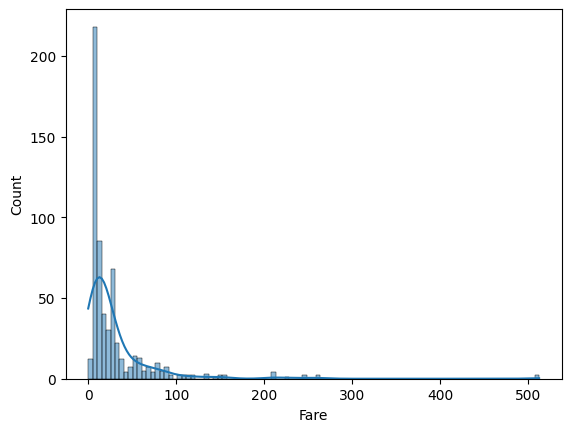

In [13]:
sns.histplot(X_train.Fare, kde=True) #stat='frequency'

In [30]:
data_transformed = pd.DataFrame(transform3.transform(X_train), columns=transform3.get_feature_names_out()).join(y_train)

<Axes: >

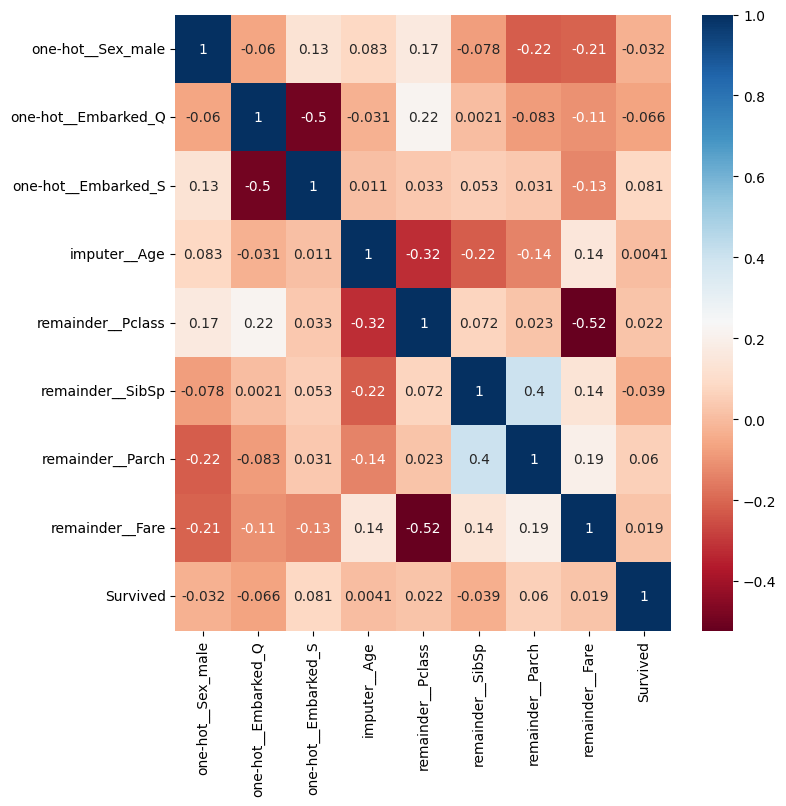

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(data_transformed.corr(), cmap="RdBu", annot=True)

## Binarization

In [ ]:
#pd.cut(data_transformed['imputer__Age'], bins=[5, 20, 45, 80])
pd.qcut(data_transformed['imputer__Age'], q=5) #labels=False

0        (20.3, 28.0]
1      (29.716, 38.0]
2        (20.3, 28.0]
3      (29.716, 38.0]
4      (29.716, 38.0]
            ...      
879      (20.3, 28.0]
880     (0.419, 20.3]
881    (28.0, 29.716]
882      (20.3, 28.0]
883    (29.716, 38.0]
Name: imputer__Age, Length: 884, dtype: category
Categories (5, interval[float64, right]): [(0.419, 20.3] < (20.3, 28.0] < (28.0, 29.716] <
                                           (29.716, 38.0] < (38.0, 80.0]]

In [32]:
# from sklearn.base import BaseEstimator, TransformerMixin
# class BinarizeAge(BaseEstimator, TransformerMixin):
#     def __init__(self, num_bins):
#         self.num_bins = num_bins

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X, y=None):
#         X['Age'] = pd.qcut(X['Age'], self.num_bins, labels=False)
#         return X
from sklearn.preprocessing import KBinsDiscretizer

In [35]:
age_transformer = Pipeline(steps=[('imputer', imp), ('fare_binarize', KBinsDiscretizer(n_bins=5, encode='ordinal'))])

In [36]:
transform4 = ColumnTransformer(transformers=[('one-hot', onee, ["Sex", "Embarked"]),
    ('imputer+bins', age_transformer, ['Age']),
    ('drop_colums', 'drop', ["PassengerId", "Name", "Ticket", "Cabin"])],
    #('age_binarize', BinarizeAge(5), ['Age'])], remainder='passthrough')
    #('fare_binarize', KBinsDiscretizer(n_bins=12, encode='ordinal'), ['Fare'])],
    remainder='passthrough')

In [37]:
transform4.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('one-hot', OneHotEncoder(drop='first'),
                                 ['Sex', 'Embarked']),
                                ('imputer+bins',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('fare_binarize',
                                                  KBinsDiscretizer(encode='ordinal'))]),
                                 ['Age']),
                                ('drop_colums', 'drop',
                                 ['PassengerId', 'Name', 'Ticket', 'Cabin'])])

In [39]:
data_transformed = pd.DataFrame(transform4.transform(X_train), columns=transform4.get_feature_names_out()).join(y_train)

<Axes: >

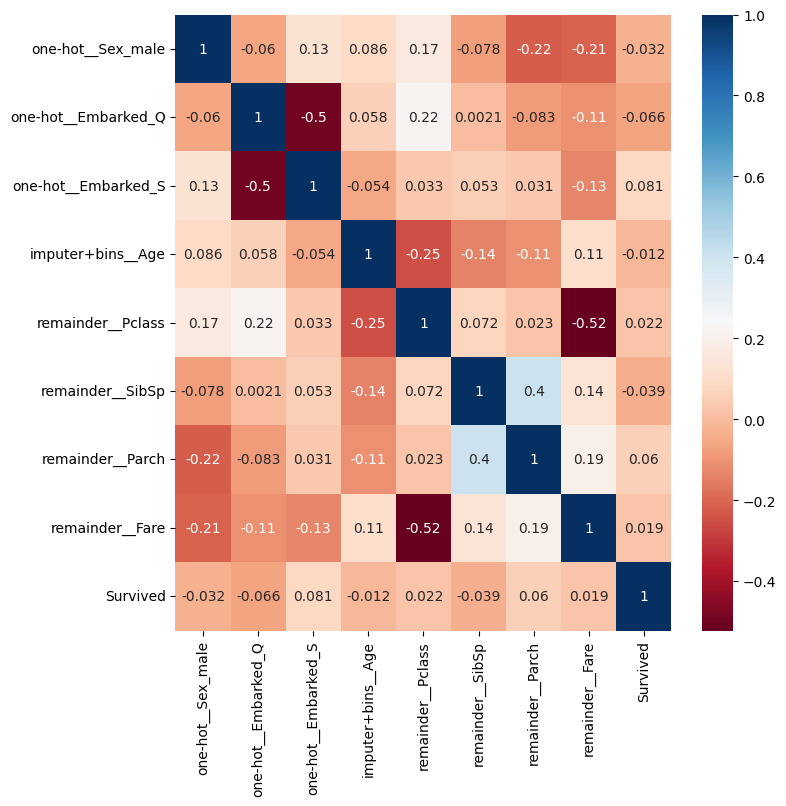

In [40]:
plt.figure(figsize=(8,8))
sns.heatmap(data_transformed.corr(), cmap="RdBu", annot=True)

In [41]:
transform5 = ColumnTransformer(transformers=[('one-hot', onee, ["Sex", "Embarked"]),
    ('imputer+bins', age_transformer, ['Age']),
    ('drop_colums', 'drop', ["PassengerId", "Name", "Ticket", "Cabin"]),
    #('age_binarize', BinarizeAge(5), ['Age'])], remainder='passthrough')
    ('fare_binarize', KBinsDiscretizer(n_bins=12, encode='ordinal'), ['Fare'])],
    remainder='passthrough')

In [42]:
transform5.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('one-hot', OneHotEncoder(drop='first'),
                                 ['Sex', 'Embarked']),
                                ('imputer+bins',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('fare_binarize',
                                                  KBinsDiscretizer(encode='ordinal'))]),
                                 ['Age']),
                                ('drop_colums', 'drop',
                                 ['PassengerId', 'Name', 'Ticket', 'Cabin']),
                                ('fare_binarize',
                                 KBinsDiscretizer(encode='ordinal', n_bins=12),
                                 ['Fare'])])

In [46]:
pipe2 = Pipeline([('transform', transform5), ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [47]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Embarked']),
                                                 ('imputer+bins',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('fare_binarize',
                                                                   KBinsDiscretizer(encode='ordinal'))]),
                                                  ['Age']),
                                                 ('drop_colums', 'drop',
                                                  ['PassengerId', 'Name',
                                                   'Ticket', 'Cabin']),
                                                 ('fare_binarize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=12),
                                                  ['Fare'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [48]:
y_pred = pipe2.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred)

0.7397260273972602

## 8. Scaling of the features
[MinMax](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)
$$
\tilde{x} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

[Standard](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
$$
\tilde{x} = \frac{x-\mu}{\sigma}
$$

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()

In [61]:
transform6 = ColumnTransformer(transformers=[('one-hot', onee, ["Sex", "Embarked"]),
    ('imputer+bins', age_transformer, ['Age']),
    ('drop_colums', 'drop', ["PassengerId", "Name", "Ticket", "Cabin"]),
    ('fare_binarize', KBinsDiscretizer(n_bins=12, encode='ordinal'), ['Fare'])],
    remainder='passthrough')

In [62]:
transform6.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('one-hot', OneHotEncoder(drop='first'),
                                 ['Sex', 'Embarked']),
                                ('imputer+bins',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('fare_binarize',
                                                  KBinsDiscretizer(encode='ordinal'))]),
                                 ['Age']),
                                ('drop_colums', 'drop',
                                 ['PassengerId', 'Name', 'Ticket', 'Cabin']),
                                ('fare_binarize',
                                 KBinsDiscretizer(encode='ordinal', n_bins=12),
                                 ['Fare'])])

In [64]:
pipe3 = Pipeline([('transform', transform6), ('scaler', sc), ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [65]:
pipe3.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Embarked']),
                                                 ('imputer+bins',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('fare_binarize',
                                                                   KBinsDiscretizer(encode='ordinal'))]),
                                                  ['Age']),
                                                 ('drop_colums', 'drop',
                                                  ['PassengerId', 'Name',
                                                   'Ticket', 'Cabin']),
                                                 ('fare_binarize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=12),
                                                  ['Fare'])])),
                ('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [66]:
y_pred = pipe3.predict(X_test)

In [67]:
accuracy_score(y_test, y_pred)

0.7636986301369864

## 9. Pairwise Plot

In [70]:
sns.pairplot(data_transformed, hue='Survived')